# Machine Learning Classification Algorithms Crash Course

##### Importing libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs, make_moons,\
    make_circles
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

##### Making functions for visuals/plotting

In [3]:
viridis = plt.cm.get_cmap('viridis', 10)

In [4]:
def set_theme():
    '''set the color and grid lines of plots'''
    return ax.set_facecolor('#E2E2E2'), \
    ax.grid(False, alpha=4e-1, color='white'), \
    ax.set_axisbelow(True)

In [5]:
def coordinates():
    '''function to plot the decision boundaries'''
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, .05))
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    return x_min, x_max, y_min, y_max, xx, yy, zz

## 1. K-nearest neighbors (KNN)

The k-nearest neighbors algorithm (k-NN) is a method frequently used for classification. The object being assigned to the class most common among its `k` nearest neighbors (k is a positive integer, typically small). If `k` = 1, then the object is simply assigned to the class of that single nearest neighbor.

##### Generating and visualizing data points

In [6]:
x, y = make_blobs(n_samples=300, centers=4, n_features=2, 
                  random_state=9, cluster_std=2)

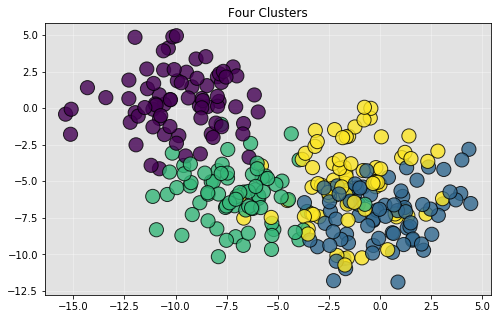

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x[:,0], x[:,1], c=y, alpha=.8, edgecolor='k', s=2e2)
set_theme()
plt.title('Four Clusters')
plt.show()

##### Fitting the model (using 10 neighbors)

The model will classify new instances in the same category as the most frequent within their **10 nearest** neighbors

In [8]:
n_neighbors = 10

In [9]:
clf = KNeighborsClassifier(n_neighbors, n_jobs=-1)
clf.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform')

In [10]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

##### Plotting the decision boundary

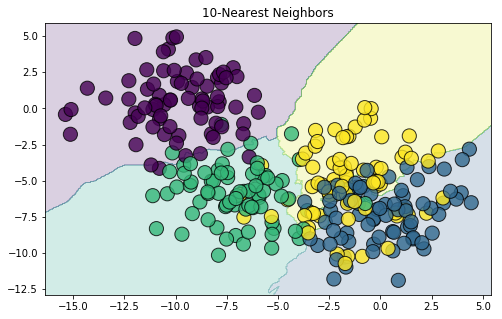

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x=x[:, 0], y=x[:, 1], c=y, edgecolor='k', 
            s=2e2, alpha=8e-1)
_ = plt.title("%i-Nearest Neighbors"%n_neighbors)

The algorithm will classify unseen instances with respect to these boundaries

#### Visualizing the decision making

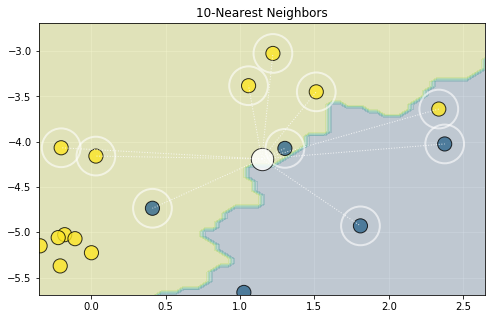

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', 
            s=2e2, alpha=8e-1)

rnd_pt = np.array([1.14667, -4.19027])

ax.scatter(rnd_pt[0], rnd_pt[1], c='white', edgecolor='k', 
            s=5e2, alpha=8e-1)

ax.scatter(x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][:, 0], # put zero to exclude og pt
           x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][:, 1], # put zero to exclude og pt
           facecolors='None', edgecolors='white',
           s=1500, alpha=.6, marker='o', lw=2)

for i in range(10):
    plt.plot([rnd_pt[0], x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][i, 0]], 
             [rnd_pt[1], x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][i, 1]],
             c='white', alpha=0.8, lw=1, linestyle=':') # or --

plt.title("%i-Nearest Neighbors"%n_neighbors)

x_coord = rnd_pt[0]
y_coord = rnd_pt[1]
plt.xlim(x_coord -1.5, x_coord +1.5)
plt.ylim(y_coord -1.5, y_coord +1.5)
_ = set_theme()

The KNN algorithm assigns to a point the most frequent class of the 10 nearest points. Here are the ten closest points.

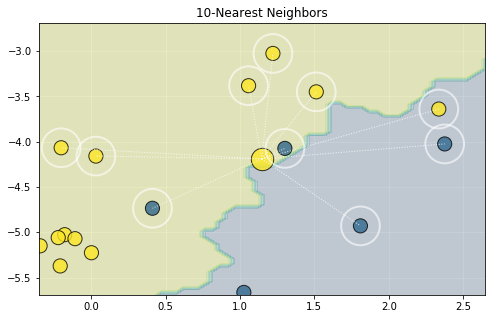

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', 
            s=2e2, alpha=8e-1)

# rnd_pt = np.array([np.random.uniform(-10, 2.5), np.random.uniform(-10, 0)])
rnd_pt = np.array([1.14667, -4.19027])

ax.scatter(rnd_pt[0], rnd_pt[1], c=viridis(clf.predict(rnd_pt.reshape(1, -1))[0]/3), edgecolor='k', 
            s=5e2, alpha=8e-1)

ax.scatter(x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][:, 0], # put zero to exclude og pt
           x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][:, 1], # put zero to exclude og pt
           facecolors='None', edgecolors='white', 
           s=1500, alpha=.6, marker='o', lw=2)

for i in range(10):
    plt.plot([rnd_pt[0], x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][i, 0]], 
             [rnd_pt[1], x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][i, 1]],
             c='white', alpha=0.8, lw=1, ls=':')

plt.title("%i-Nearest Neighbors"%n_neighbors)

x_coord = rnd_pt[0]
y_coord = rnd_pt[1]
plt.xlim(x_coord -1.5, x_coord +1.5)
plt.ylim(y_coord -1.5, y_coord +1.5)
_ = set_theme()

##### Coefficients weighted by distance

An interesting feature is that the weights can depend on the distance. Closer points would have more influence on class assignment.

In [14]:
clf = KNeighborsClassifier(n_neighbors, n_jobs=-1, weights='distance')
clf.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='distance')

In [15]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

##### Plotting train/test data points with the decision boundary

In [16]:
rnd_pt = np.array([0.73929783, -5.55772625])

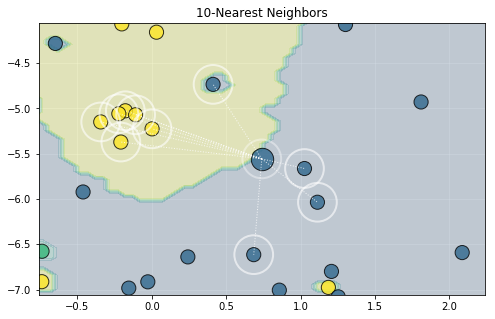

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', 
            s=2e2, alpha=8e-1)

rnd_pt = np.array([0.73929783, -5.55772625])

ax.scatter(rnd_pt[0], rnd_pt[1],
           facecolors='None', edgecolors='white', 
           s=1500, alpha=.4, marker='o', lw=2)

ax.scatter(rnd_pt[0], rnd_pt[1], c=viridis(clf.predict(rnd_pt.reshape(1, -1))[0]/3), edgecolor='k', 
            s=5e2, alpha=8e-1)

ax.scatter(x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][:, 0], # put zero to exclude og pt
           x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][:, 1], # put zero to exclude og pt
           facecolors='None', edgecolors='white', 
           s=1500, alpha=.6, marker='o', lw=2)

for i in range(10):
    plt.plot([rnd_pt[0], x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][i, 0]], 
             [rnd_pt[1], x[np.array(clf.kneighbors(rnd_pt.reshape(1, -1)))[1, :, :].astype(int)][0][i, 1]],
             c='white', alpha=0.8, lw=1, ls=':')

plt.title("%i-Nearest Neighbors"%n_neighbors)

x_coord = rnd_pt[0]
y_coord = rnd_pt[1]
plt.xlim(x_coord -1.5, x_coord +1.5)
plt.ylim(y_coord -1.5, y_coord +1.5)
_ = set_theme()

This time, a class which wasn't the most frequent was assigned. The points with the most frequent color were very far away. In contrast, points from the 'blue' class were much closer. The weights of the blue class were therefore more important. 

## 2. K-Means

K-means clustering aims to divide `n` observations into `k` clusters in which each observation belongs to the cluster with the nearest mean.

#### Generating points

In [18]:
x, y = make_blobs(n_samples=300, centers=4, n_features=2, random_state=25, cluster_std=1.5)

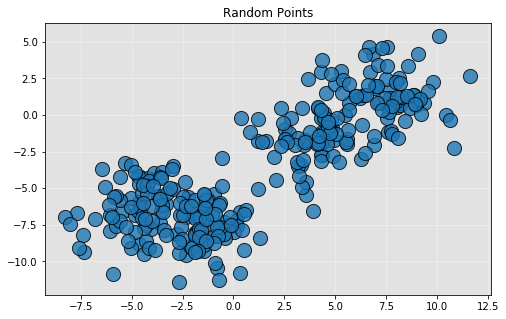

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x[:, 0], x[:, 1], alpha=.8, edgecolor='k', s=2e2)
set_theme()
plt.title('Random Points')
plt.show()

##### Fitting the model 

The model will cluster the data points into **4** centers.

In [20]:
clf = KMeans(n_clusters=4, n_jobs=-1)
clf.fit(x, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

##### Plotting the decision boundary

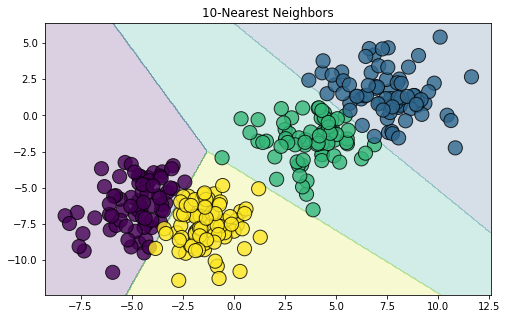

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x=x[:, 0], y=x[:, 1], c=clf.predict(x), edgecolor='k', 
            s=2e2, alpha=8e-1)
_ = plt.title("%i-Nearest Neighbors"%n_neighbors)

The algorithm will classify unseen instances according to this decision function. Let's see the mean of the 4 clusters.

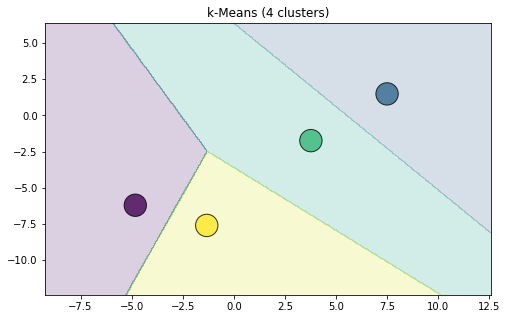

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], c=clf.predict(clf.cluster_centers_), 
            linewidths=1, edgecolor='k', s=500, alpha=.8)
_ = plt.title('k-Means (4 clusters)')

#### We can also visualize it in 3D

In [24]:
x, y = make_blobs(n_samples=300, centers=6, n_features=3, random_state=42, cluster_std=2)

In [25]:
clf = KMeans(n_clusters=6, n_jobs=-1)
clf.fit(x, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

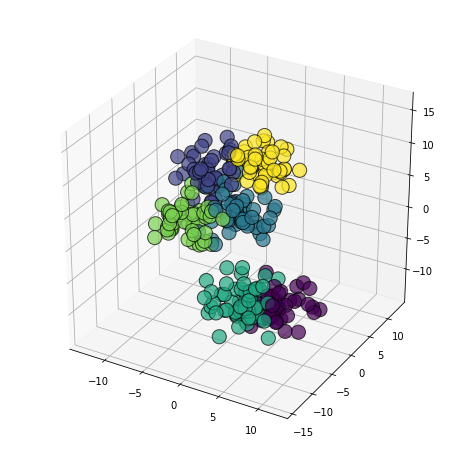

In [26]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=clf.predict(x), linewidths=1, alpha=.7, edgecolor='k', s = 200)

And now the cluster centers...

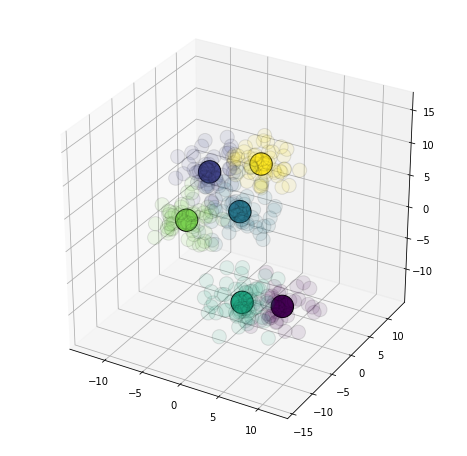

In [27]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

_ = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=clf.predict(x), linewidths=1, alpha=.1, edgecolor='k', s = 200)

_ = ax.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], 
               clf.cluster_centers_[:, 2], c=clf.predict(clf.cluster_centers_), 
               linewidths=1, alpha=1, edgecolor='k', s=500)

## 3. Decision trees

Decision trees work by splitting features in order to get the most efficient split between categories.

In [29]:
x, y = make_blobs(n_samples=300, centers=4, n_features=2, 
                  random_state=54, cluster_std=2)

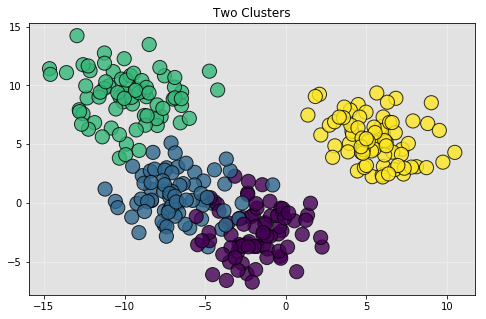

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x[:,0], x[:,1], c=y, alpha=8e-1, 
           edgecolor='k', s=2e2)
set_theme()
title = plt.title('Two Clusters')

In [31]:
clf = DecisionTreeClassifier(max_depth=1)

In [32]:
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

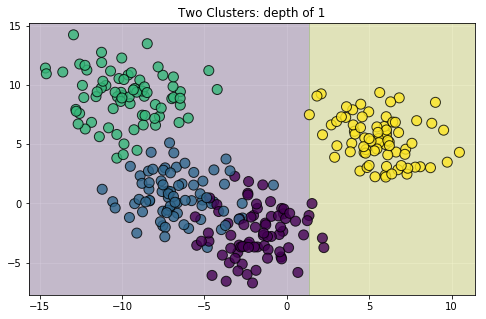

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:,0], x[:,1], c=y, alpha=8e-1, edgecolor='k', s=1e2)
set_theme()
title = plt.title('Two Clusters: depth of 1')

As you can see, the decision tree made **one** split, which gives the greatest Gini gain.

In [35]:
clf = DecisionTreeClassifier(max_depth=8)

In [36]:
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

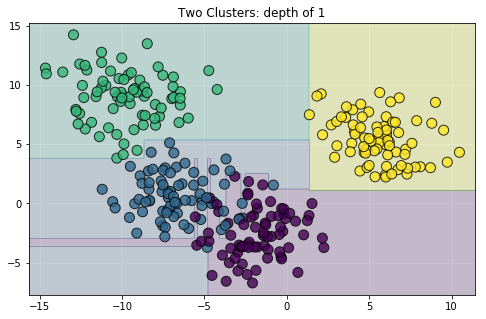

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:,0], x[:,1], c=y, alpha=8e-1, edgecolor='k', s=1e2)
set_theme()
title = plt.title('Two Clusters: depth of 1')

The decision tree already overfits the data. We can limit the maximum number of points that the decision tree will split for to regularize. This is done by using `min_samples_leaf`

In [359]:
clf = DecisionTreeClassifier(min_samples_leaf=8)

In [360]:
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [361]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

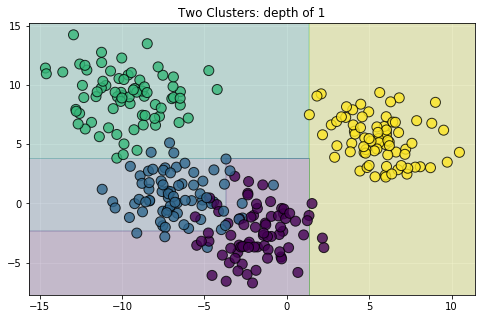

In [362]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:,0], x[:,1], c=y, alpha=8e-1, edgecolor='k', s=1e2)
set_theme()
title = plt.title('Two Clusters: depth of 1')

We can visualize the decision making with a decision tree graph

In [53]:
export_graphviz(
    clf,
    out_file=r'C:\Users\Nicolas\Anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin/graphviz/tut_tree.dot',
    feature_names=['X', 'Y'],
    class_names=['Purple', 'Blue', 'Green', 'Yellow'],
    rounded=True,
    max_depth=3,
    filled=True,
    rotate=True)

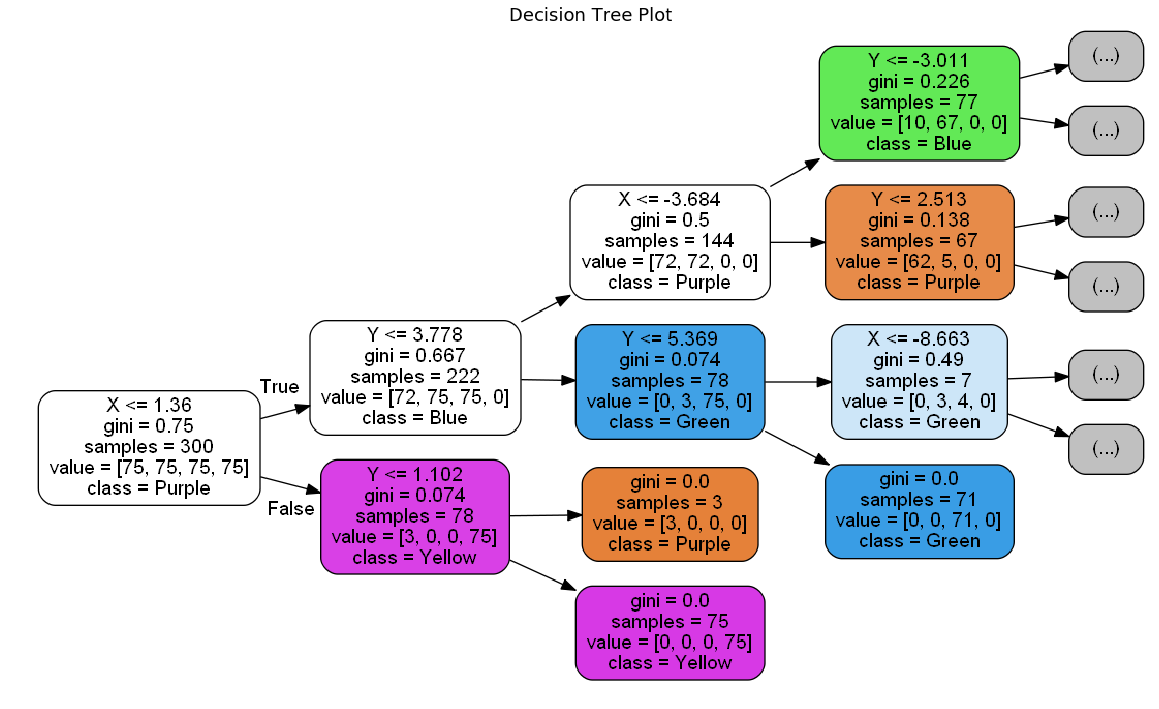

In [65]:
tree = plt.imread(r'C:\Users\Nicolas\Anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz/tut_tree.jpg')
plt.figure(figsize = (20,20))
plt.imshow(tree, interpolation='nearest')
plt.grid(None, alpha=0)
plt.axis('off')
_=plt.title('Decision Tree Plot', fontsize=18)

The top row explains the rule. If `X > 1.36`, the class is purple

## 4. SVM 

SVM finds the largest 'street' between categories of the data. In other words, it maximizes the margin between instances of different classes.

In [66]:
x, y = make_moons(n_samples=300, noise=.2)

In [67]:
clf = SVC()

In [68]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

(-2, 3)

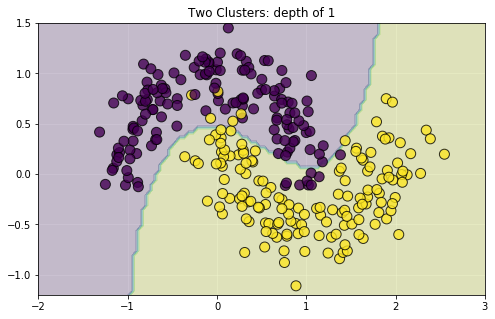

In [70]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:,0], x[:,1], c=y, alpha=8e-1, edgecolor='k', s=1e2)
set_theme()
# plot_svc_decision_function(clf)
title = plt.title('Two Clusters: depth of 1')
plt.ylim(-1.2, 1.5)
plt.xlim(-2, 3)

Sometimes, fitting a line in the data is not possible. In this case, we adjust the `C` parameter, which allows a 'soft margin', which means that certain points can be on the wrong side of the line. Large values make it impossible to cross the line.

In [72]:
clf = SVC(C=1_000_000_000)

In [73]:
clf.fit(x, y)

SVC(C=1000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

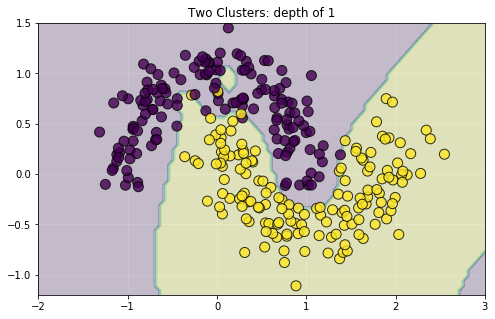

In [76]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:,0], x[:,1], c=y, alpha=8e-1, edgecolor='k', s=1e2)
set_theme()
# plot_svc_decision_function(clf)
title = plt.title('Two Clusters: depth of 1')
plt.ylim(-1.2, 1.5)
_=plt.xlim(-2, 3)

The classifier is more generalizable with a medium amount of regularization (a softer margin)

In [77]:
clf = SVC(C=10)

In [78]:
clf.fit(x, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

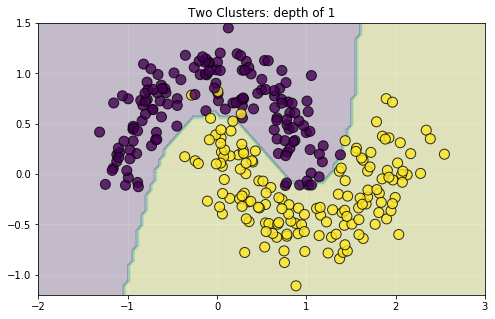

In [81]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:,0], x[:,1], c=y, alpha=8e-1, edgecolor='k', s=1e2)
set_theme()
title = plt.title('Two Clusters: depth of 1')
plt.ylim(-1.2, 1.5)
_=plt.xlim(-2, 3)

It will be easier to see how SVM maximizes the margin if the two classes are neatly separated.

In [87]:
x, y = make_moons(n_samples=300, noise=.07)

In [109]:
clf = SVC(C=1_000_000_000_000)

In [110]:
clf.fit(x, y)

SVC(C=1000000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
x_min, x_max, y_min, y_max, xx, yy, z = coordinates()

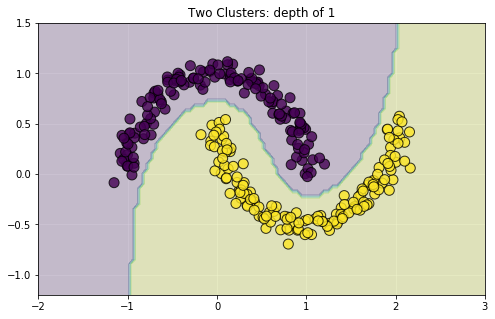

In [112]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.contourf(xx, yy, z, alpha=.2)
ax.scatter(x[:,0], x[:,1], c=y, alpha=8e-1, edgecolor='k', s=1e2)
set_theme()
title = plt.title('Two Clusters: depth of 1')
plt.ylim(-1.2, 1.5)
_=plt.xlim(-2, 3)

Sometimes, fitting a line in the data is not possible. In this case, we adjust the `C` parameter, which allows a 'soft margin', which means that certain points can be on the wrong side of the line. Large values make it impossible to cross the line.